In [2]:
#Importando librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Estableciendo el url del respositoirio de donde se extrajo la información
url='https://raw.githubusercontent.com/JFRo57/HousePrices/main/HousePrices.csv'

In [4]:
#importamos y creamos el dataframe
df= pd.read_csv(url,encoding="UTF-8", index_col=0)

#La pregunta quer estaremos trababajando en este trabajo será revelar como influyen las
#características de la vivienda en su precio final

In [5]:
#Haremos una vista rápida para observar los datos que contiene
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Haremos una copia del Dataframe para poder volver por si ocurre un error (según lo recomendado en el curso)
df1=df.copy()
#También aprovecharemos para ver cuantos archivos existen en el df
df1.tail(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
df1.shape  #Esto nos dice cuantas columnas y filas existen

(1460, 80)

In [8]:
#Ahora veremos las columnas que existen en la tabla
for col in df1.columns:
    print (col)

MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [9]:
#Tipos de datos
df1.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [10]:
#Como vemos tenemos datos NaN que no sirven para el análisis, así que procederemos a eliminarlos
df2=df1.dropna(axis=1, how='any')

In [11]:
#Vemos ahora cuantas columnas quedaron después de depurar
df2.shape

(1460, 61)

In [12]:
#Ahora procedemos a hacer un reconocimiento de los datos, así veremos su naturaleza
#sus valores y darnos una idea de la magnitud

In [13]:
df2['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
mean = df1['SalePrice'].mean()
mean

180921.19589041095

In [17]:
# Manejo de valores NaN
print("\nCantidad de valores NaN por columna:")
print(df2.isnull().sum())



Cantidad de valores NaN por columna:
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 61, dtype: int64


In [19]:
# Eliminamos columnas con valores NaN, si es que hubiera alguna
df2 = df2.dropna(axis=1)

In [20]:
# Verificamos cuántas columnas quedaron después de eliminar valores NaN
print("\nNúmero de columnas después de eliminar valores NaN:")
print(df2.shape)


Número de columnas después de eliminar valores NaN:
(1460, 61)


In [21]:
# Análisis descriptivo de la variable 'SalePrice'
print("\nEstadísticas de 'SalePrice':")
print(df2['SalePrice'].describe())


Estadísticas descriptivas de 'SalePrice':
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-23-31560e2c7607>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['SalePrice'], palette="hls")


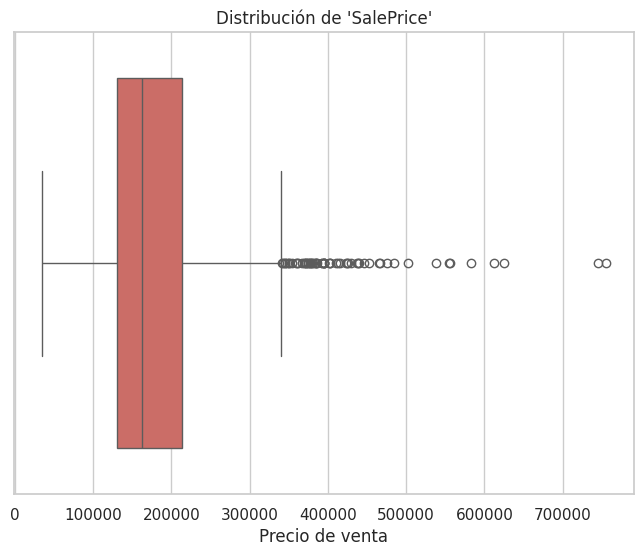

In [23]:
# Gráfico de caja (boxplot) para visualizar la distribución de 'SalePrice'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['SalePrice'], palette="hls")
plt.title("Distribución de 'SalePrice'")
plt.xlabel("Precio de venta")
plt.show()

<ipython-input-25-2d665c937ee8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


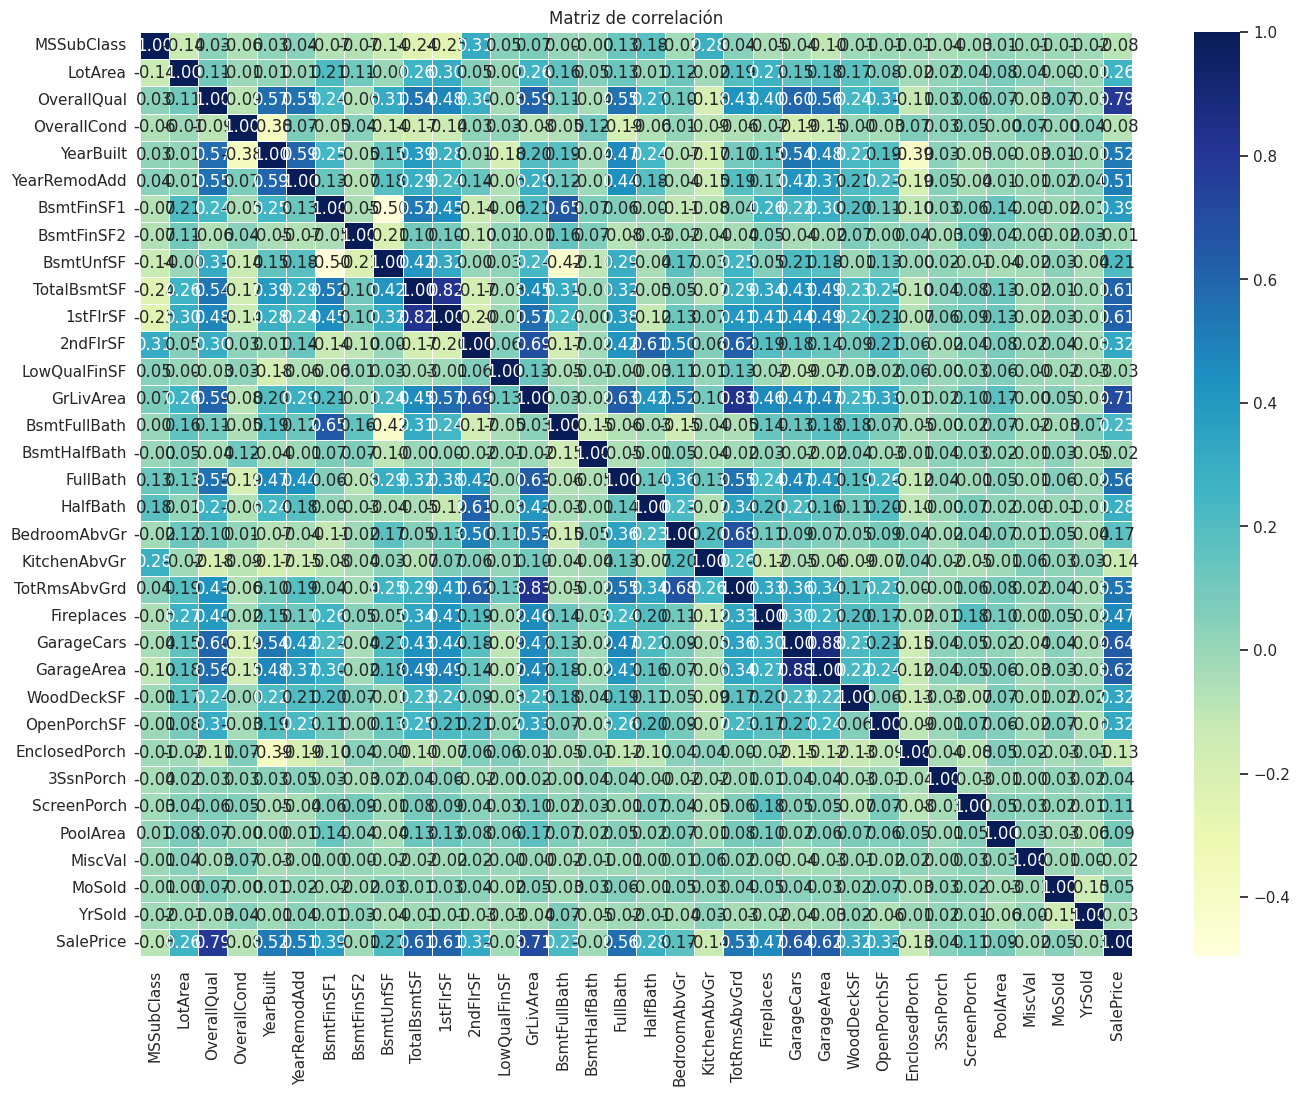

In [25]:
# Calcularemos la matriz de correlación
correlation_matrix = df2.corr()

# Código para visualizar nuestro heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Matriz de correlación")
plt.show()


In [ ]:
#como vemos se ve muy poco debido a la cantidad de variables pero aun así podemos encontrar algunos datos


In [ ]:
#Dividimos el conjunto de datos en conjunto de entrenamiento o "train"  y conjunto de prueba (test)
X = df2.drop(columns=['SalePrice'])
y = df2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creamos un modelo de regresión lineal
model = LinearRegression()

In [ ]:
#Entrenamos el modelo con los datos de entrenamiento...
model.fit(X_train, y_train)

In [ ]:
#Testeamos predicciones en el conjunto de prueba...
y_pred = model.predict(X_test)

In [ ]:
#Calculamos el error cuadrático medio (que tan bien se ajusta a los datos)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)

In [ ]:

#Calcular el coeficiente de determinación (R^2) en el conjunto de prueba
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2) en el conjunto de prueba:", r2)